In [1]:
import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

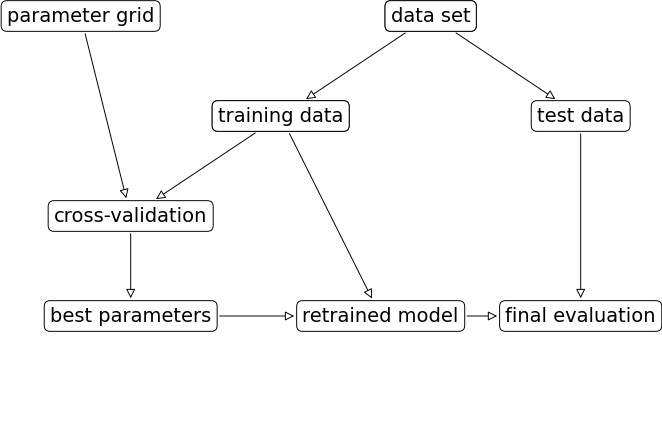

In [2]:
mglearn.plots.plot_grid_search_overview()

In [3]:
dat = pd.read_csv("/courses/EDS232/Data/demo-spotify.csv")

For GridSearchCV we need an instantiated model and parameter grid

The method considers product of the sets and evaluates each combination one by one.

The standard preparation:

In [4]:
# Define features and target
X = dat.drop(columns=['genre'])
y = dat['genre']

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Drop non-numeric columns
X = X.drop(columns=non_numeric_cols)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=808)

rf = RandomForestClassifier()

Now we will construct our parameter grid

In [6]:
param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [5, 10, 20, None],
    "max_features": ["sqrt", 9, None]
}

gs = GridSearchCV(rf, param_grid = param_grid, n_jobs = -1, return_train_score= True)

The GridSearchCV object above behaves like a classifier. We can call fit, predict or score on it.

In [7]:
# Carry out the search 

gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 9, None],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True)

In [8]:
# Get the best hyperparameter values
gs.best_params_

{'max_depth': 20, 'max_features': 9, 'n_estimators': 200}

It is often helpful to visualize results of all cross-validation experiments.
You can access this information using cv_results_ attribute of a fitted GridSearchCV object.

In [9]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.482145,0.100761,0.035909,0.012098,5,sqrt,10,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.880069,0.880932,...,0.879020,0.002019,47,0.886380,0.883647,0.887602,0.886676,0.891565,0.887174,0.002561
1,2.097433,0.182382,0.064239,0.006324,5,sqrt,50,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.880357,0.881507,...,0.880573,0.001514,46,0.888393,0.885805,0.887459,0.889696,0.890271,0.888325,0.001598
2,4.266420,0.309197,0.121267,0.014975,5,sqrt,100,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.881795,0.882657,...,0.881666,0.001611,45,0.892133,0.889185,0.890479,0.889768,0.892284,0.890770,0.001245
3,10.456401,0.755118,0.354360,0.039655,5,sqrt,200,"{'max_depth': 5, 'max_features': 'sqrt', 'n_es...",0.881795,0.884383,...,0.881724,0.002644,44,0.891845,0.889832,0.890479,0.890774,0.891134,0.890813,0.000670
4,0.888096,0.124202,0.035010,0.006042,5,9,10,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.884671,0.879494,...,0.883449,0.003530,40,0.891845,0.890910,0.894075,0.893291,0.888258,0.891676,0.002033
5,4.626234,0.520860,0.098401,0.016015,5,9,50,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.883520,0.881219,...,0.883795,0.002282,39,0.893212,0.893499,0.892636,0.895376,0.893363,0.893617,0.000927
6,11.667927,1.280586,0.207496,0.030642,5,9,100,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.885534,0.885534,...,0.885405,0.001954,38,0.893283,0.895369,0.896160,0.892860,0.891422,0.893819,0.001723
7,28.232212,2.140168,0.475765,0.089680,5,9,200,"{'max_depth': 5, 'max_features': 9, 'n_estimat...",0.880357,0.886972,...,0.885463,0.004204,37,0.893427,0.896879,0.893427,0.894154,0.893219,0.894221,0.001366
8,1.734746,0.043401,0.034083,0.003383,5,None,10,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.871153,0.872016,...,0.875856,0.005438,48,0.884870,0.886883,0.888609,0.888186,0.890199,0.887749,0.001787
9,9.815970,0.992533,0.124916,0.017162,5,None,50,"{'max_depth': 5, 'max_features': None, 'n_esti...",0.874029,0.878919,...,0.882127,0.005853,42,0.886811,0.895872,0.894506,0.896383,0.895520,0.893819,0.003557


Let's look at only the most relevant rows

In [10]:
# Select relevant columns
filtered_results = pd.DataFrame(gs.cv_results_)[
    [
        "mean_test_score",
        "param_n_estimators",   # Number of trees
        "param_max_depth",      # Max depth of trees
        "param_max_features",   # Feature selection per split
        "mean_fit_time",        # Time taken to fit the model
        "rank_test_score",      # Rank of the best score
    ]
].set_index("rank_test_score").sort_index().T

Other than searching for best hyperparameter values, GridSearchCV also fits a new model on the whole training set with the parameters that yielded the best results.
So we can conveniently call score on the test set with a fitted GridSearchCV object.

In [ ]:
# Best score

# Get the test scores 


Why are best_score_ and the score above different?



Visualizing parameters as heat 

In [12]:
def display_heatmap(param_grid, model, X_train, y_train):
   
    grid_search = GridSearchCV(
        model, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring="accuracy"
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Convert results to DataFrame
    results = pd.DataFrame(grid_search.cv_results_)

    # Extract parameter names dynamically
    param_x, param_y = list(param_grid.keys())

    # Reshape test scores into a 2D array for heatmap
    scores = results.pivot(index=f"param_{param_y}", columns=f"param_{param_x}", values="mean_test_score")

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(scores, annot=True, fmt=".3f", cmap="coolwarm")
    plt.xlabel(param_x)
    plt.ylabel(param_y)
    plt.title(f"Grid Search Heatmap ({param_x} vs. {param_y})")
    plt.show()


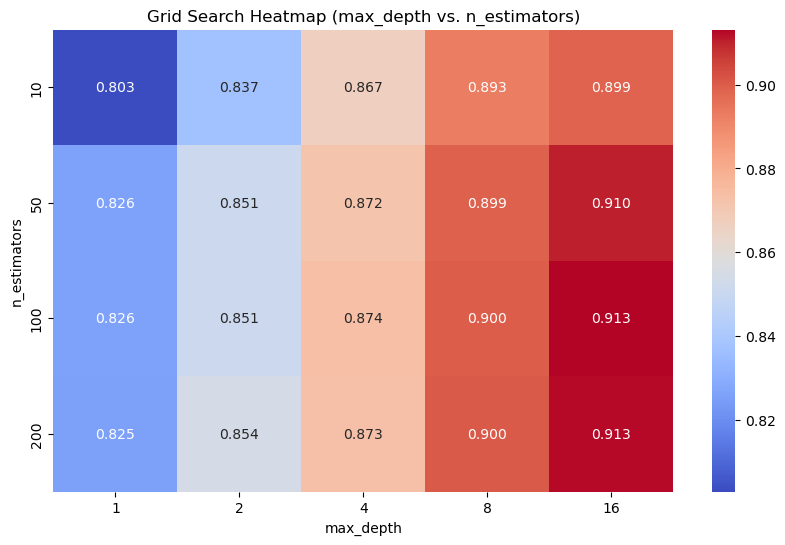

In [14]:

# Define the hyperparameter grid for max_depth vs. n_estimators
param_grid1 = {
    "max_depth": [1,2,4,8,16],
    "n_estimators": [10,50,100,200]
}


# Call the function
display_heatmap(param_grid1, rf, X_train, y_train)

A key problem with exhaustive grid search is the required number of models to evaluate grows exponentially with the dimensionally of the configuration space.

For future discussion:
sklearn.model_selection.RandomizedSearchCV
Samples configurations at random until certain budget (e.g., time) is exhausted.